In [1]:
import numpy as np # linear algebra
import pandas as pd # data processing, CSV file I/O (e.g. pd.read_csv)

# keeps the plots in one place. calls image as static pngs
%matplotlib inline 
import matplotlib.pyplot as plt # side-stepping mpl backend
import matplotlib.gridspec as gridspec # subplots
#import mpld3 as mpl

#Import models from scikit learn module:
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LogisticRegression
from sklearn.cross_validation import KFold   #For K-fold cross validation
from sklearn.ensemble import RandomForestClassifier
from sklearn.tree import DecisionTreeClassifier, export_graphviz
from sklearn import metrics

C:\Users\User\Anaconda3\lib\site-packages\sklearn\cross_validation.py:41: DeprecationWarning: This module was deprecated in version 0.18 in favor of the model_selection module into which all the refactored classes and functions are moved. Also note that the interface of the new CV iterators are different from that of this module. This module will be removed in 0.20.
  "This module will be removed in 0.20.", DeprecationWarning)


In [2]:
#!pip install mpld3

In [3]:
df=pd.read_csv("G:/final year project/Mask ventillation/Mask ventilation data and code/Mask ventilation data roline/Mask_ventilation_dataset_final_dataset.csv")

In [4]:
df

,age,gender,bmi,beard,mallampati,neck_radiation,ulbt,teeth,neck_circumference,macroglossia,history_of_snoring,stiff_lungs,target
0,51,male,15.0,yes,1,no,1,yes,32,yes,no,no,difficult
1,51,male,15.0,yes,1,no,1,yes,34,yes,no,no,difficult
2,51,male,15.0,yes,1,no,1,yes,36,yes,no,no,difficult
3,51,male,15.0,yes,1,no,1,yes,38,yes,no,no,difficult
4,51,male,15.0,yes,1,no,1,yes,20,yes,no,no,difficult
5,51,male,15.0,yes,1,no,1,yes,22,yes,no,no,difficult
6,51,male,15.0,yes,1,no,1,yes,24,yes,no,no,difficult
7,51,male,15.0,yes,1,no,1,yes,26,yes,no,no,difficult
8,51,male,15.0,yes,1,no,1,yes,28,yes,no,no,difficult
9,51,male,15.0,yes,1,no,1,yes,30,yes,no,no,difficult


In [5]:
df.target.unique()

array(['difficult', 'easy', 'impossible'], dtype=object)

In [6]:
df['target']=df['target'].map({'difficult':1, 'easy':0, 'impossible':2})

In [7]:
df

,age,gender,bmi,beard,mallampati,neck_radiation,ulbt,teeth,neck_circumference,macroglossia,history_of_snoring,stiff_lungs,target
0,51,male,15.0,yes,1,no,1,yes,32,yes,no,no,1
1,51,male,15.0,yes,1,no,1,yes,34,yes,no,no,1
2,51,male,15.0,yes,1,no,1,yes,36,yes,no,no,1
3,51,male,15.0,yes,1,no,1,yes,38,yes,no,no,1
4,51,male,15.0,yes,1,no,1,yes,20,yes,no,no,1
5,51,male,15.0,yes,1,no,1,yes,22,yes,no,no,1
6,51,male,15.0,yes,1,no,1,yes,24,yes,no,no,1
7,51,male,15.0,yes,1,no,1,yes,26,yes,no,no,1
8,51,male,15.0,yes,1,no,1,yes,28,yes,no,no,1
9,51,male,15.0,yes,1,no,1,yes,30,yes,no,no,1


In [8]:
df.head()

,age,gender,bmi,beard,mallampati,neck_radiation,ulbt,teeth,neck_circumference,macroglossia,history_of_snoring,stiff_lungs,target
0,51,male,15.0,yes,1,no,1,yes,32,yes,no,no,1
1,51,male,15.0,yes,1,no,1,yes,34,yes,no,no,1
2,51,male,15.0,yes,1,no,1,yes,36,yes,no,no,1
3,51,male,15.0,yes,1,no,1,yes,38,yes,no,no,1
4,51,male,15.0,yes,1,no,1,yes,20,yes,no,no,1


In [9]:
df.beard.unique()

array(['yes', 'no'], dtype=object)

In [10]:
df['beard']=df['beard'].map({'yes':1, 'no':0})

In [11]:
df.head()

,age,gender,bmi,beard,mallampati,neck_radiation,ulbt,teeth,neck_circumference,macroglossia,history_of_snoring,stiff_lungs,target
0,51,male,15.0,1,1,no,1,yes,32,yes,no,no,1
1,51,male,15.0,1,1,no,1,yes,34,yes,no,no,1
2,51,male,15.0,1,1,no,1,yes,36,yes,no,no,1
3,51,male,15.0,1,1,no,1,yes,38,yes,no,no,1
4,51,male,15.0,1,1,no,1,yes,20,yes,no,no,1


In [12]:
df.neck_radiation.unique()

array(['no', 'yes'], dtype=object)

In [13]:
df['neck_radiation']=df['neck_radiation'].map({'yes':1, 'no':0})

In [14]:
df.head()

,age,gender,bmi,beard,mallampati,neck_radiation,ulbt,teeth,neck_circumference,macroglossia,history_of_snoring,stiff_lungs,target
0,51,male,15.0,1,1,0,1,yes,32,yes,no,no,1
1,51,male,15.0,1,1,0,1,yes,34,yes,no,no,1
2,51,male,15.0,1,1,0,1,yes,36,yes,no,no,1
3,51,male,15.0,1,1,0,1,yes,38,yes,no,no,1
4,51,male,15.0,1,1,0,1,yes,20,yes,no,no,1


In [15]:
df.teeth.unique()

array(['yes', 'no'], dtype=object)

In [16]:
df.stiff_lungs.unique()

array(['no', 'yes'], dtype=object)

In [17]:
df['teeth']=df['teeth'].map({'yes':1, 'no':0})
df['stiff_lungs']=df['stiff_lungs'].map({'yes':1, 'no':0})


In [18]:
df.head()

,age,gender,bmi,beard,mallampati,neck_radiation,ulbt,teeth,neck_circumference,macroglossia,history_of_snoring,stiff_lungs,target
0,51,male,15.0,1,1,0,1,1,32,yes,no,0,1
1,51,male,15.0,1,1,0,1,1,34,yes,no,0,1
2,51,male,15.0,1,1,0,1,1,36,yes,no,0,1
3,51,male,15.0,1,1,0,1,1,38,yes,no,0,1
4,51,male,15.0,1,1,0,1,1,20,yes,no,0,1


In [19]:
df.macroglossia.unique()

array(['yes', 'no'], dtype=object)

In [20]:
df.history_of_snoring.unique()

array(['no', 'yes'], dtype=object)

In [21]:
df['macroglossia']=df['macroglossia'].map({'yes':1, 'no':0})

In [22]:
df['history_of_snoring']=df['history_of_snoring'].map({'yes':1, 'no':0})

In [23]:
df.head()

,age,gender,bmi,beard,mallampati,neck_radiation,ulbt,teeth,neck_circumference,macroglossia,history_of_snoring,stiff_lungs,target
0,51,male,15.0,1,1,0,1,1,32,1,0,0,1
1,51,male,15.0,1,1,0,1,1,34,1,0,0,1
2,51,male,15.0,1,1,0,1,1,36,1,0,0,1
3,51,male,15.0,1,1,0,1,1,38,1,0,0,1
4,51,male,15.0,1,1,0,1,1,20,1,0,0,1


In [24]:
df.head()

,age,gender,bmi,beard,mallampati,neck_radiation,ulbt,teeth,neck_circumference,macroglossia,history_of_snoring,stiff_lungs,target
0,51,male,15.0,1,1,0,1,1,32,1,0,0,1
1,51,male,15.0,1,1,0,1,1,34,1,0,0,1
2,51,male,15.0,1,1,0,1,1,36,1,0,0,1
3,51,male,15.0,1,1,0,1,1,38,1,0,0,1
4,51,male,15.0,1,1,0,1,1,20,1,0,0,1


In [25]:
df.gender.unique()

array(['male'], dtype=object)

In [26]:
df.describe()

,age,bmi,beard,mallampati,neck_radiation,ulbt,teeth,neck_circumference,macroglossia,history_of_snoring,stiff_lungs,target
count,700848.000000,700848.000000,700848.000000,700848.000000,700848.000000,700848.000000,700848.000000,700848.000000,700848.000000,700848.000000,700848.000000,700848.000000
mean,80.032258,30.212314,0.184006,2.244869,0.009731,1.825372,0.874381,29.241331,0.108280,0.067233,0.238854,0.980538
std,17.835251,12.100490,0.387489,1.088536,0.098165,0.833296,0.331420,6.084655,0.310734,0.250425,0.426383,0.196330
min,51.000000,15.000000,0.000000,1.000000,0.000000,1.000000,0.000000,20.000000,0.000000,0.000000,0.000000,0.000000
25%,64.000000,20.000000,0.000000,1.000000,0.000000,1.000000,1.000000,24.000000,0.000000,0.000000,0.000000,1.000000
50%,80.000000,25.000000,0.000000,2.000000,0.000000,2.000000,1.000000,30.000000,0.000000,0.000000,0.000000,1.000000
75%,96.000000,40.000000,0.000000,3.000000,0.000000,3.000000,1.000000,34.000000,0.000000,0.000000,0.000000,1.000000
max,110.000000,60.000000,1.000000,4.000000,1.000000,3.000000,1.000000,54.000000,1.000000,1.000000,1.000000,2.000000


In [27]:
df['gender']=df['gender'].map({'male':0})

In [28]:
df

,age,gender,bmi,beard,mallampati,neck_radiation,ulbt,teeth,neck_circumference,macroglossia,history_of_snoring,stiff_lungs,target
0,51,0,15.0,1,1,0,1,1,32,1,0,0,1
1,51,0,15.0,1,1,0,1,1,34,1,0,0,1
2,51,0,15.0,1,1,0,1,1,36,1,0,0,1
3,51,0,15.0,1,1,0,1,1,38,1,0,0,1
4,51,0,15.0,1,1,0,1,1,20,1,0,0,1
5,51,0,15.0,1,1,0,1,1,22,1,0,0,1
6,51,0,15.0,1,1,0,1,1,24,1,0,0,1
7,51,0,15.0,1,1,0,1,1,26,1,0,0,1
8,51,0,15.0,1,1,0,1,1,28,1,0,0,1
9,51,0,15.0,1,1,0,1,1,30,1,0,0,1


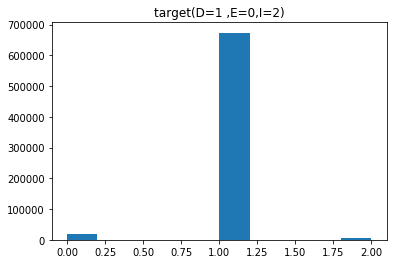

In [29]:
df.describe()
plt.hist(df['target'])
plt.title('target(D=1 ,E=0,I=2)')
plt.show()

In [30]:
feature_mean=list(df.columns[0:12])

In [31]:
feature_mean=['age','bmi','beard','mallampati','neck_radiation','ulbt','teeth','neck_circumference','macroglossia','history_of_snoring','stiff_lungs']

In [32]:
dfD=df[df['target']==1]
dfE=df[df['target']==0]
dfI=df[df['target']==2]

C:\Users\User\Anaconda3\lib\site-packages\matplotlib\axes\_axes.py:6462: UserWarning: The 'normed' kwarg is deprecated, and has been replaced by the 'density' kwarg.
  warnings.warn("The 'normed' kwarg is deprecated, and has been "


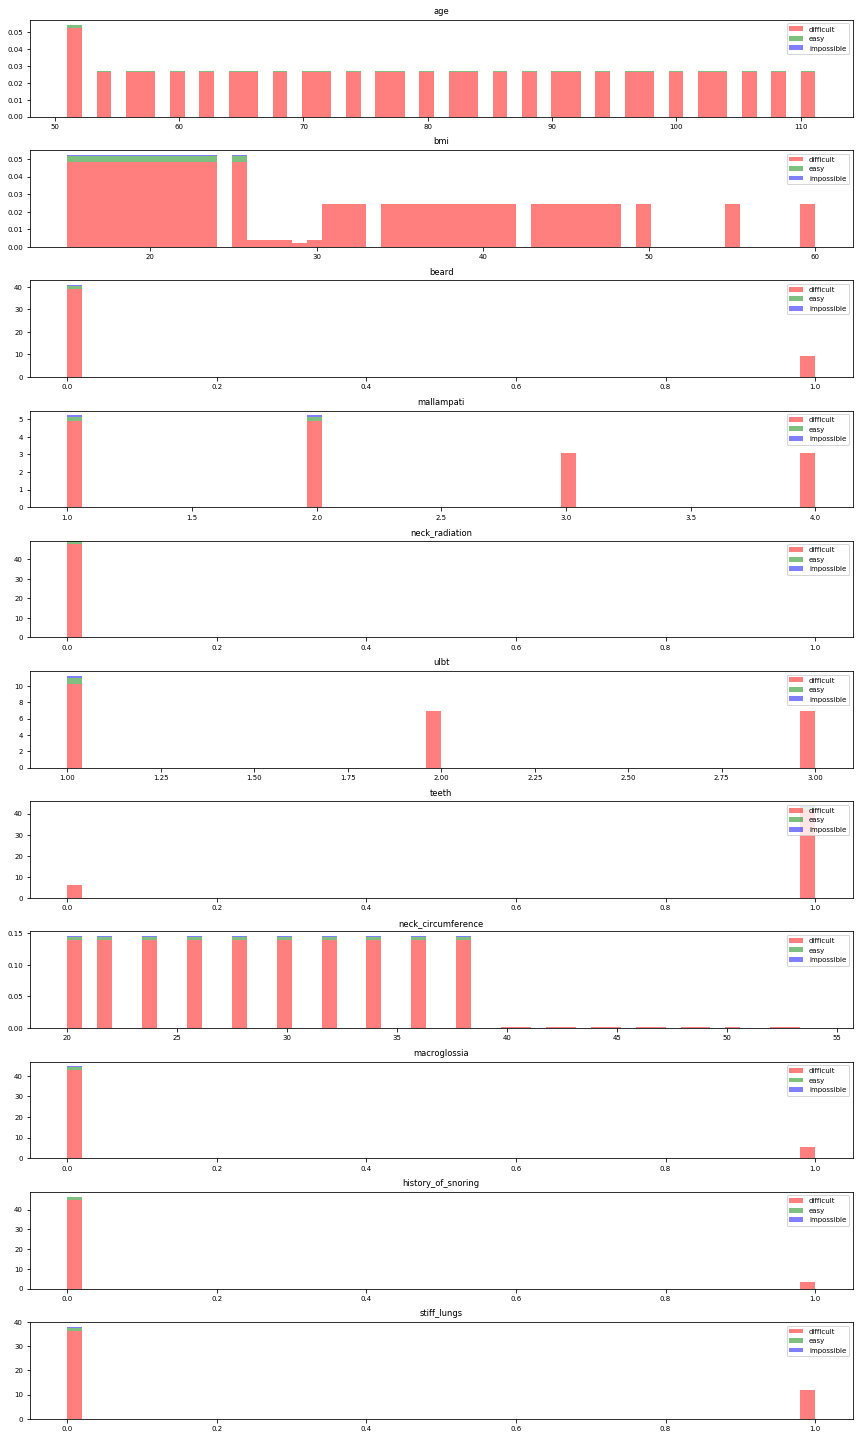

In [33]:
plt.rcParams.update({'font.size':7})
fig, axes= plt.subplots(nrows=11, ncols=1 , figsize=(12,20))
axes=axes.ravel()
for idx,ax in  enumerate(axes):
    ax.figure
    binwidth=(max(df[feature_mean[idx]]) - min(df[feature_mean[idx]]))/50
    ax.hist([dfD[feature_mean[idx]],dfE[feature_mean[idx]],dfI[feature_mean[idx]]],bins=np.arange(min(df[feature_mean[idx]]),max(df[feature_mean[idx]]) + binwidth, binwidth), alpha=0.5,stacked=True,normed=True,label=['difficult','easy','impossible'],color=['r','g','b'])
    ax.legend(loc= 'upper right')
    ax.set_title(feature_mean[idx])
    
plt.tight_layout()
plt.show()

In [52]:
traindf, testdf = train_test_split(df, test_size = 0.3)


In [54]:
testdf.target.unique()

array([1, 0, 2], dtype=int64)

In [35]:
#Generic function for making a classification model and accessing the performance. 
# From AnalyticsVidhya tutorial
def classification_model(model, data, predictors, outcome):
  #Fit the model:
  model.fit(data[predictors],data[outcome])
  
  #Make predictions on training set:
  predictions = model.predict(data[predictors])
  
  #Print accuracy
  accuracy = metrics.accuracy_score(predictions,data[outcome])
  print("Accuracy : %s" % "{0:.3%}".format(accuracy))

  #Perform k-fold cross-validation with 5 folds
  kf = KFold(data.shape[0], n_folds=5)
  error = []
  for train, test in kf:
    # Filter training data
    train_predictors = (data[predictors].iloc[train,:])
    
    # The target we're using to train the algorithm.
    train_target = data[outcome].iloc[train]
    
    # Training the algorithm using the predictors and target.
    model.fit(train_predictors, train_target)
    
    #Record error from each cross-validation run
    error.append(model.score(data[predictors].iloc[test,:], data[outcome].iloc[test]))
    
    print("Cross-Validation Score : %s" % "{0:.3%}".format(np.mean(error)))
    
  #Fit the model again so that it can be refered outside the function:
  model.fit(data[predictors],data[outcome]) 
  

In [57]:
#Generic function for making a classification model and accessing the performance. 
# From AnalyticsVidhya tutorial
def classification_model1(model, data, predictors, outcome):
  #Fit the model:
  model.fit(data[predictors],data[outcome])
  
  #Make predictions on training set:
  predictions = model.predict(testdf[predictors])
  
  #Print accuracy
  accuracy = metrics.accuracy_score(predictions,testdf[outcome])
  print("Accuracy : %s" % "{0:.3%}".format(accuracy))

  #Perform k-fold cross-validation with 5 folds
  kf = KFold(data.shape[0], n_folds=5)
  error = []
  for train, test in kf:
    # Filter training data
    train_predictors = (data[predictors].iloc[train,:])
    
    # The target we're using to train the algorithm.
    train_target = data[outcome].iloc[train]
    
    # Training the algorithm using the predictors and target.
    model.fit(train_predictors, train_target)
    
    #Record error from each cross-validation run
    error.append(model.score(data[predictors].iloc[test,:], data[outcome].iloc[test]))
    
    print("Cross-Validation Score : %s" % "{0:.3%}".format(np.mean(error)))
    
  #Fit the model again so that it can be refered outside the function:
  model.fit(data[predictors],data[outcome]) 
  

In [58]:
predictor_var = ['age','bmi',
 'beard',
 'mallampati',
 'neck_radiation',
 'ulbt',
 'teeth','neck_circumference','macroglossia','history_of_snoring',
 'stiff_lungs']
outcome_var='target'
model=LogisticRegression()
classification_model1(model,traindf,predictor_var,outcome_var)

Accuracy : 97.571%
Cross-Validation Score : 97.611%
Cross-Validation Score : 97.617%
Cross-Validation Score : 97.606%
Cross-Validation Score : 97.611%
Cross-Validation Score : 97.611%


In [37]:
predictor_var = ['age']
outcome_var='target'
model=LogisticRegression()
classification_model(model,traindf,predictor_var,outcome_var)

Accuracy : 96.112%
Cross-Validation Score : 96.234%
Cross-Validation Score : 96.139%
Cross-Validation Score : 96.137%
Cross-Validation Score : 96.103%
Cross-Validation Score : 96.112%


In [59]:
predictor_var = ['age','bmi',
 'beard',
 'mallampati',
 'neck_radiation',
 'ulbt',
 'teeth','neck_circumference','macroglossia','history_of_snoring',
 'stiff_lungs']
outcome_var='target'
model = DecisionTreeClassifier()
classification_model1(model,traindf,predictor_var,outcome_var)

Accuracy : 97.255%
Cross-Validation Score : 97.288%
Cross-Validation Score : 97.239%
Cross-Validation Score : 97.221%
Cross-Validation Score : 97.229%
Cross-Validation Score : 97.236%


In [60]:
predictor_var = ['age','bmi',
 'beard',
 'mallampati',
 'neck_radiation',
 'ulbt',
 'teeth','neck_circumference','macroglossia','history_of_snoring',
 'stiff_lungs']
outcome_var='target'
model = RandomForestClassifier(n_estimators=100,min_samples_split=50, max_depth=1, max_features=2)
classification_model1(model, traindf,predictor_var,outcome_var)

Accuracy : 96.066%
Cross-Validation Score : 96.067%
Cross-Validation Score : 96.104%
Cross-Validation Score : 96.092%
Cross-Validation Score : 96.125%
Cross-Validation Score : 96.125%


In [40]:
predictor_var = ['age','bmi',
 'beard',
 'mallampati',
 'neck_radiation',
 'ulbt',
 'teeth','neck_circumference','macroglossia','history_of_snoring',
 'stiff_lungs']

In [41]:
from sklearn import svm


In [42]:
svc = svm.SVC(kernel='rbf', C=1)
classification_model(model, traindf,predictor_var,outcome_var)

Accuracy : 96.112%
Cross-Validation Score : 96.234%
Cross-Validation Score : 96.139%
Cross-Validation Score : 96.137%
Cross-Validation Score : 96.103%
Cross-Validation Score : 96.112%


In [43]:
df

,age,gender,bmi,beard,mallampati,neck_radiation,ulbt,teeth,neck_circumference,macroglossia,history_of_snoring,stiff_lungs,target
0,51,0,15.0,1,1,0,1,1,32,1,0,0,1
1,51,0,15.0,1,1,0,1,1,34,1,0,0,1
2,51,0,15.0,1,1,0,1,1,36,1,0,0,1
3,51,0,15.0,1,1,0,1,1,38,1,0,0,1
4,51,0,15.0,1,1,0,1,1,20,1,0,0,1
5,51,0,15.0,1,1,0,1,1,22,1,0,0,1
6,51,0,15.0,1,1,0,1,1,24,1,0,0,1
7,51,0,15.0,1,1,0,1,1,26,1,0,0,1
8,51,0,15.0,1,1,0,1,1,28,1,0,0,1
9,51,0,15.0,1,1,0,1,1,30,1,0,0,1


In [44]:
age_array=np.array(df['target'])

In [45]:
print(age_array)

[1 1 1 ... 1 1 1]


In [46]:
import collections

In [47]:
freq=collections.Counter(age_array)

In [48]:
for key in freq:
    print(key," - > ",freq[key])

1  - >  673568
0  - >  20460
2  - >  6820


In [49]:
df

,age,gender,bmi,beard,mallampati,neck_radiation,ulbt,teeth,neck_circumference,macroglossia,history_of_snoring,stiff_lungs,target
0,51,0,15.0,1,1,0,1,1,32,1,0,0,1
1,51,0,15.0,1,1,0,1,1,34,1,0,0,1
2,51,0,15.0,1,1,0,1,1,36,1,0,0,1
3,51,0,15.0,1,1,0,1,1,38,1,0,0,1
4,51,0,15.0,1,1,0,1,1,20,1,0,0,1
5,51,0,15.0,1,1,0,1,1,22,1,0,0,1
6,51,0,15.0,1,1,0,1,1,24,1,0,0,1
7,51,0,15.0,1,1,0,1,1,26,1,0,0,1
8,51,0,15.0,1,1,0,1,1,28,1,0,0,1
9,51,0,15.0,1,1,0,1,1,30,1,0,0,1


In [50]:
#Naive bayes
from sklearn.naive_bayes import GaussianNB
predictor_var = ['age','bmi',
 'beard',
 'mallampati',
 'neck_radiation',
 'ulbt',
 'teeth','neck_circumference','macroglossia','history_of_snoring',
 'stiff_lungs']
outcome_var='target'
model = GaussianNB()
classification_model(model, traindf,predictor_var,outcome_var)

Accuracy : 90.551%
Cross-Validation Score : 90.607%
Cross-Validation Score : 90.528%
Cross-Validation Score : 90.573%
Cross-Validation Score : 90.574%
Cross-Validation Score : 90.562%


In [51]:
#Knn
from sklearn.neighbors import KNeighborsClassifier
predictor_var = ['age','bmi',
 'beard',
 'mallampati',
 'neck_radiation',
 'ulbt',
 'teeth','neck_circumference','macroglossia','history_of_snoring',
 'stiff_lungs']
outcome_var='target'
model = KNeighborsClassifier(n_neighbors=6)
classification_model(model, traindf,predictor_var,outcome_var)

Accuracy : 97.324%
Cross-Validation Score : 95.763%
Cross-Validation Score : 95.679%
Cross-Validation Score : 95.673%
Cross-Validation Score : 95.672%
Cross-Validation Score : 95.664%
